In [3]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [6]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [7]:
sample_string = "Tensorflow, from basic to mastery"

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [6307, 2327, 2934, 2, 48, 2715, 7, 2652, 8050]


In [8]:
original_string = tokenizer.decode(tokenized_string)
print('Original string is:  {}'.format(original_string))


Original string is:  Tensorflow, from basic to mastery


In [9]:
for ts in tokenized_string:
  print('{}----->{}'.format(ts, tokenizer.decode([ts])))

6307----->Ten
2327----->sor
2934----->flow
2----->, 
48----->from 
2715----->basic 
7----->to 
2652----->master
8050----->y


In [10]:
embedding_dim = 64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
#!pip install tensorflow==2.0.0-beta0
#!pip install tensorflow-datasets==1.3.1

In [0]:
num_epochs = 10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [13]:
history = model.fit(
          train_data,
          epochs= num_epochs,
          validation_data = test_data,
)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 369s 15ms/step - loss: 0.6866 - accuracy: 0.5254 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 203s 8ms/step - loss: 0.6839 - accuracy: 0.5348 - val_loss: 0.6844 - val_accuracy: 0.5352
Epoch 3/10
25000/25000 [==============================] - 201s 8ms/step - loss: 0.6829 - accuracy: 0.5379 - val_loss: 0.6840 - val_accuracy: 0.5366
Epoch 4/10
25000/25000 [==============================] - 205s 8ms/step - loss: 0.6822 - accuracy: 0.5396 - val_loss: 0.6841 - val_accuracy: 0.5369
Epoch 5/10
25000/25000 [==============================] - 202s 8ms/step - loss: 0.6818 - accuracy: 0.5408 - val_loss: 0.6842 - val_accuracy: 0.5370
Epoch 6/10
25000/25000 [==============================] - 204s 8ms/step - loss: 0.6814 - accuracy: 0.5417 - val_loss: 0.6844 - val_accuracy: 0.5371
Epoch 7/10
25000/25000 [==============================] - 203s 8ms/step - loss: 0.6811 - accuracy: 0.5426 - val_lo

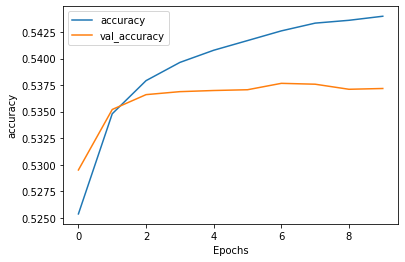

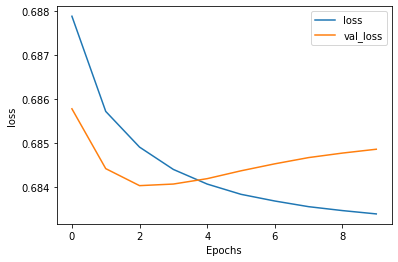

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")